# Exploring the Zoo-Animals dataset

At any point in this workbook, if you have something you'd like to share, 
- make a gist | push your changes to gh
- nbviewer will read from either and render the notebook https://nbviewer.jupyter.org/ 

In [45]:
import pandas as pd
import numpy as np

df = pd.read_csv('zoo.csv')

print(df.head())

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2           4  
3   

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Explore the data
Sometimes, we come at a dataset without knowing anything about it, and having no questions posed.  Doing some initial exploration of the data can help us find good questions to ask later.  This process is called [Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis). 

We use tools from [description statistics](https://en.wikipedia.org/wiki/Descriptive_statistics) and visualizations to get a better intuition on our sample.  There are a few examples here, but of course add some of your own in the cells afterwards.

### Matplotlib
Matplotlib is a library meant to mimic matlab-style plotting.  You build up a plot through a sequence of calls to the pyplot object (`plt` below), which keeps track of the data and options you set until you call `plt.show()`.

Index([u'hair', u'feathers', u'eggs', u'milk', u'airborne', u'aquatic',
       u'predator', u'toothed', u'backbone', u'breathes', u'venomous', u'fins',
       u'legs', u'tail', u'domestic', u'catsize'],
      dtype='object')


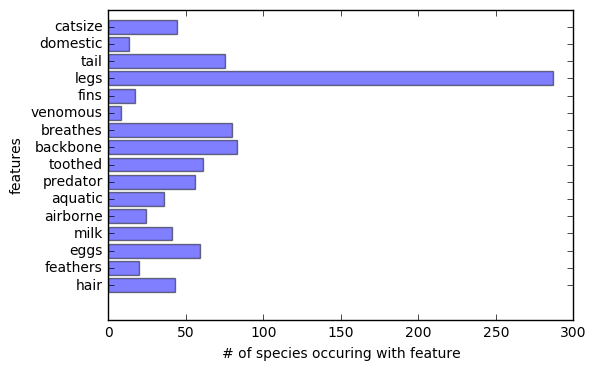

In [54]:
features = df.ix[:,1:-1]
features_total = features.sum()
feature_names = features_total.axes[0]
print(feature_names)
y_ticks = np.arange(len(feature_names))
plt.barh(y_ticks, features_total, align='center', alpha=0.5)
plt.yticks(x_ticks, feature_names)
plt.xlabel('# of species occuring with feature')
plt.ylabel('features')
plt.show()

### Choosing a Classifier

### What we're missing: testing

We've choosen a fairly small dataset here. What's wrong with that?

Resources used in ithis presentation: 
- [Understanding Exploratory Data Analysis](http://machinelearningmastery.com/understand-problem-get-better-results-using-exploratory-data-analysis/)
